# Analysis of Generated Corpus

This notebook performs a quality check on the `large_corpus.txt` file generated by our script. The goal is to verify that the corpus exhibits properties of natural language before using it for further research.

**Analysis Steps:**
1.  **Load Corpus**: Read the generated text file.
2.  **Calculate Basic Statistics**: Compute total words and vocabulary size.
3.  **Analyze Frequency Distribution**: Calculate word frequencies and visualize them to check for properties like Zipf's Law.
4.  **Inspect Content**: Review the most and least frequent words as a sanity check.

In [35]:
# Load and Analyze the Generated Corpus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os
import sys

# Add parent directory to Python path for imports
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath('.')))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import path utilities for cross-platform compatibility
try:
    from path_utils import get_project_path, get_output_path
    print("✅ Path utilities loaded successfully")
except ImportError:
    print("⚠️ Path utilities not found, using fallback functions")
    
    def get_project_path(relative_path):
        """Fallback path utility function"""
        if os.path.exists(relative_path):
            return relative_path
        parent_path = os.path.join('..', relative_path)
        if os.path.exists(parent_path):
            return parent_path
        return relative_path
    
    def get_output_path(filename):
        """Fallback output path utility function"""
        output_dir = get_project_path('output')
        os.makedirs(output_dir, exist_ok=True)
        return os.path.join(output_dir, filename)

# Load the generated corpus using path utilities
corpus_path = get_output_path('large_corpus_2m_qwen_dynamic_20250908_002429.txt')

try:
    print(f"🔍 Loading corpus from: {corpus_path}")
    with open(corpus_path, 'r', encoding='utf-8') as f:
        corpus_text = f.read()
    
    print(f"✅ Corpus loaded successfully from '{corpus_path}'.")
    print(f"Total characters: {len(corpus_text):,}")
    
    # Basic text processing
    # Simple tokenization - split by whitespace and remove punctuation
    words = re.findall(r'\b[a-zA-Z]+\b', corpus_text.lower())
    
    # Calculate statistics
    total_words = len(words)
    unique_words = len(set(words))
    
    print("\n--- Corpus Statistics ---")
    print(f"Total Words (Tokens): {total_words:,}")
    print(f"Vocabulary Size (Unique Words): {unique_words:,}")
    print("-------------------------")
    
except FileNotFoundError:
    print(f"❌ Error: Corpus file not found at {corpus_path}")
    print("Please make sure you've run the corpus generation script first.")
    words = []

⚠️ Path utilities not found, using fallback functions
🔍 Loading corpus from: ..\output\large_corpus_2m_qwen_dynamic_20250908_002429.txt
✅ Corpus loaded successfully from '..\output\large_corpus_2m_qwen_dynamic_20250908_002429.txt'.
Total characters: 15,517,265

--- Corpus Statistics ---
Total Words (Tokens): 2,303,623
Vocabulary Size (Unique Words): 27,848
-------------------------

--- Corpus Statistics ---
Total Words (Tokens): 2,303,623
Vocabulary Size (Unique Words): 27,848
-------------------------


## 1. Load Corpus and Calculate Basic Statistics
First, we load the `large_corpus.txt` file and perform basic text processing to calculate the total number of words (tokens) and the size of the vocabulary (unique words).

In [36]:
# Load the generated corpus
corpus_path = '../output/large_corpus_2m_qwen_dynamic_20250908_002429.txt'
try:
    with open(corpus_path, 'r', encoding='utf-8') as f:
        corpus_text = f.read()
    print(f"✅ Corpus loaded successfully from '{corpus_path}'.")
except FileNotFoundError:
    print(f"❌ Error: '{corpus_path}' not found. Please ensure the generation script has been run.")
    corpus_text = ""

if corpus_text:
    # Remove metadata comments before processing
    # The DOTALL flag is crucial for multiline JSON
    cleaned_text = re.sub(r'<!-- Story Metadata:.*?-->', '', corpus_text, flags=re.DOTALL)
    
    # Tokenize the text into words using a simple regex
    # This finds sequences of word characters, converting to lowercase
    words = re.findall(r'\b\w+\b', cleaned_text.lower())
    
    # Calculate statistics
    total_words = len(words)
    unique_words = len(set(words))
    
    print("\n--- Corpus Statistics ---")
    print(f"Total Words (Tokens): {total_words:,}")
    print(f"Vocabulary Size (Unique Words): {unique_words:,}")
    print("-------------------------")

✅ Corpus loaded successfully from '../output/large_corpus_2m_qwen_dynamic_20250908_002429.txt'.

--- Corpus Statistics ---
Total Words (Tokens): 2,114,673
Vocabulary Size (Unique Words): 28,670
-------------------------

--- Corpus Statistics ---
Total Words (Tokens): 2,114,673
Vocabulary Size (Unique Words): 28,670
-------------------------


## 2. Calculate and Visualize Word Frequency Distribution (Zipf's Law)
A key characteristic of natural language is that the frequency of any word is inversely proportional to its rank in the frequency table. When plotted on a log-log scale, this relationship should appear as a straight line. This is known as Zipf's Law and serves as an excellent quality check for our generated corpus.

Plotting the frequency distribution...


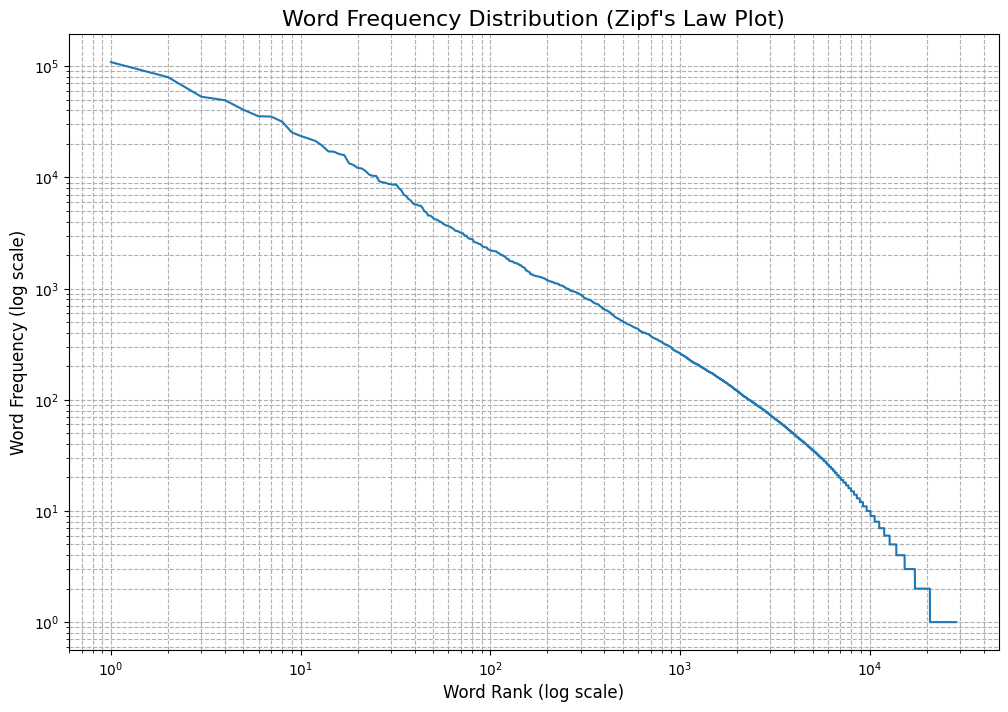

In [37]:
if 'words' in locals() and words:
    # Calculate word frequencies
    word_counts = Counter(words)
    
    # Get the frequencies and sort them in descending order
    frequencies = sorted(word_counts.values(), reverse=True)
    
    # Create ranks for the x-axis
    ranks = np.arange(1, len(frequencies) + 1)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.loglog(ranks, frequencies)
    plt.title("Word Frequency Distribution (Zipf's Law Plot)", fontsize=16)
    plt.xlabel("Word Rank (log scale)", fontsize=12)
    plt.ylabel("Word Frequency (log scale)", fontsize=12)
    plt.grid(True, which="both", ls="--")
    
    print("Plotting the frequency distribution...")
    plt.show()
else:
    print("⚠️ No words available to plot. Please run the previous cells.")

## 2.1. Additional Frequency Distribution Visualizations
Let's create several complementary visualizations to better understand the word frequency patterns in our generated corpus.

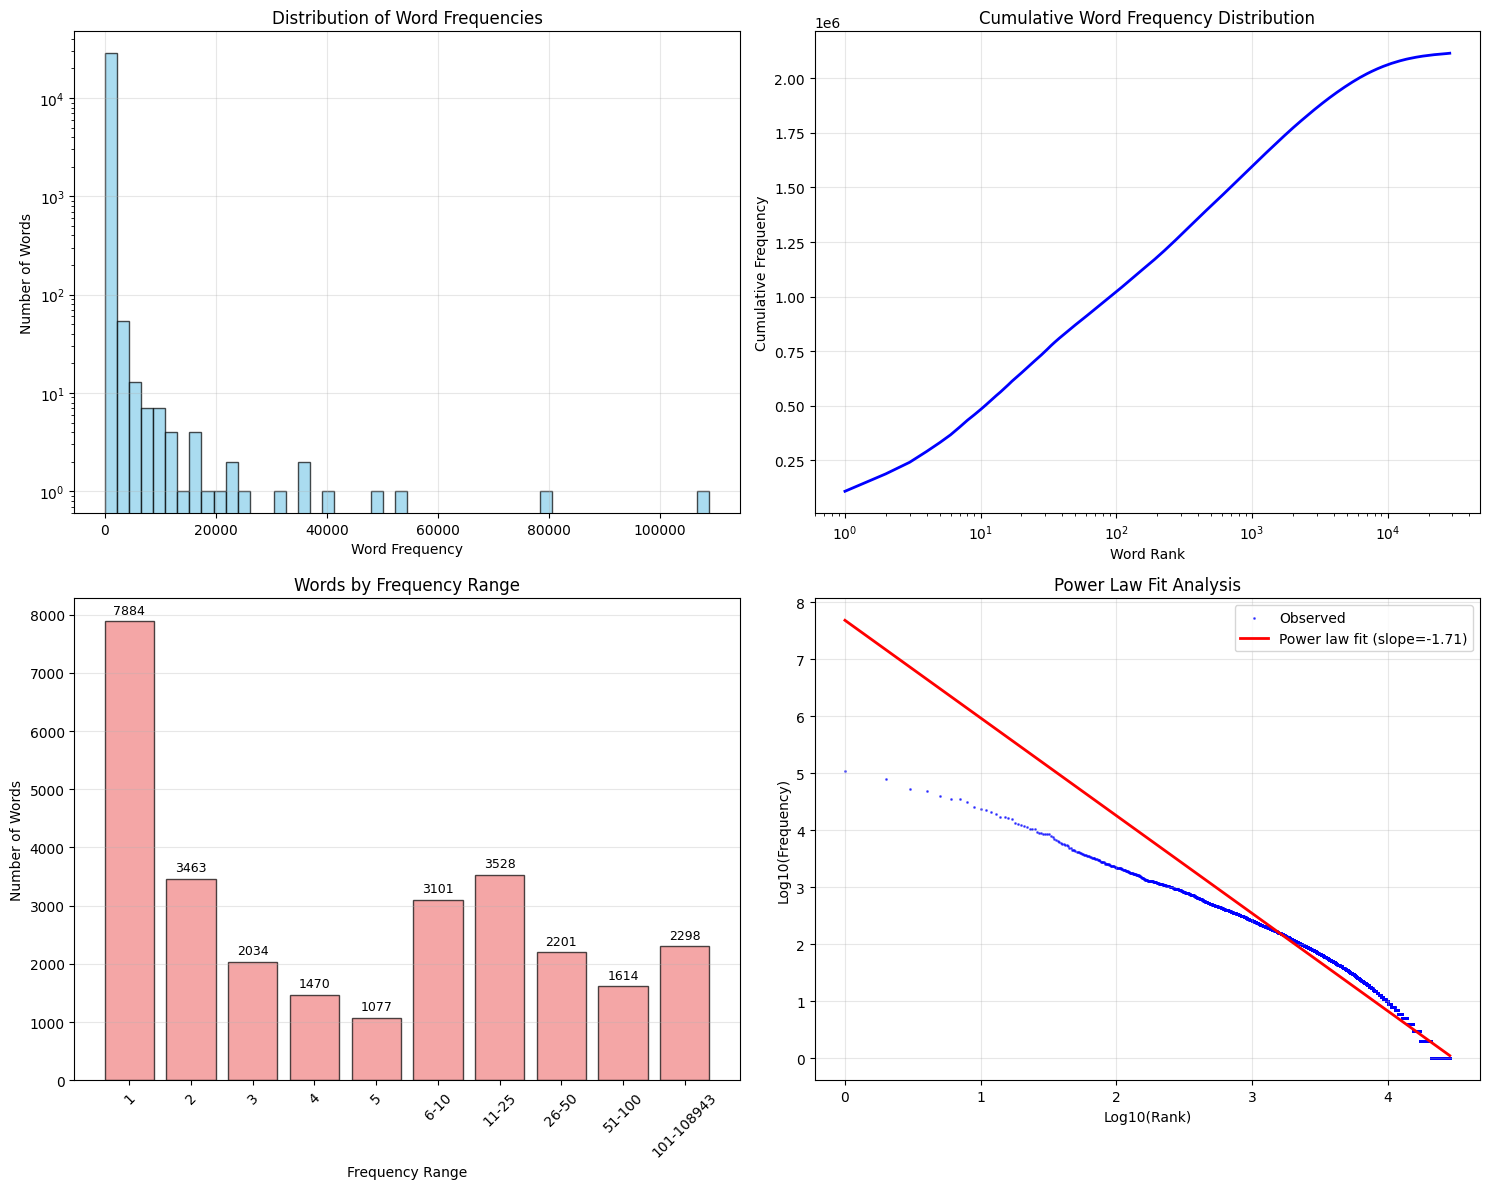


--- Frequency Distribution Summary ---
Total unique words: 28,670
Words appearing only once (hapax legomena): 7,884
Words appearing twice: 3,463
Words appearing 10+ times: 10,101
Most frequent word appears: 108,943 times
Average word frequency: 73.76
Median word frequency: 4.00
Power law slope (Zipf exponent): 1.713
----------------------------------------


In [38]:
if 'word_counts' in locals() and word_counts:
    # Create a comprehensive set of frequency distribution plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Histogram of word frequencies (log scale)
    frequencies = list(word_counts.values())
    axes[0, 0].hist(frequencies, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Word Frequency')
    axes[0, 0].set_ylabel('Number of Words')
    axes[0, 0].set_title('Distribution of Word Frequencies')
    axes[0, 0].set_yscale('log')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Cumulative frequency distribution
    sorted_freqs = sorted(frequencies, reverse=True)
    cumulative_freqs = np.cumsum(sorted_freqs)
    ranks = np.arange(1, len(sorted_freqs) + 1)
    
    axes[0, 1].plot(ranks, cumulative_freqs, 'b-', linewidth=2)
    axes[0, 1].set_xlabel('Word Rank')
    axes[0, 1].set_ylabel('Cumulative Frequency')
    axes[0, 1].set_title('Cumulative Word Frequency Distribution')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_xscale('log')
    
    # 3. Frequency bins analysis
    max_freq = max(frequencies)
    freq_bins = [1, 2, 3, 4, 5, 10, 25, 50, 100, 500, max_freq]
    bin_labels = ['1', '2', '3', '4', '5', '6-10', '11-25', '26-50', '51-100', f'101-{max_freq}']
    bin_counts = []
    
    # Create the bins properly - we should have len(bin_labels) bins
    bin_ranges = [
        (1, 1), (2, 2), (3, 3), (4, 4), (5, 5),
        (6, 10), (11, 25), (26, 50), (51, 100), (101, max_freq)
    ]
    
    for lower, upper in bin_ranges:
        count = sum(1 for f in frequencies if lower <= f <= upper)
        bin_counts.append(count)
    
    bars = axes[1, 0].bar(bin_labels, bin_counts, color='lightcoral', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Frequency Range')
    axes[1, 0].set_ylabel('Number of Words')
    axes[1, 0].set_title('Words by Frequency Range')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, count in zip(bars, bin_counts):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + max(bin_counts)*0.01,
                       f'{count}', ha='center', va='bottom', fontsize=9)
    
    # 4. Power law fit comparison
    log_ranks = np.log10(ranks)
    log_freqs = np.log10(sorted_freqs)
    
    # Fit a line to the log-log plot
    coeffs = np.polyfit(log_ranks, log_freqs, 1)
    fitted_line = coeffs[0] * log_ranks + coeffs[1]
    
    axes[1, 1].scatter(log_ranks, log_freqs, alpha=0.6, s=1, color='blue', label='Observed')
    axes[1, 1].plot(log_ranks, fitted_line, 'r-', linewidth=2, 
                   label=f'Power law fit (slope={coeffs[0]:.2f})')
    axes[1, 1].set_xlabel('Log10(Rank)')
    axes[1, 1].set_ylabel('Log10(Frequency)')
    axes[1, 1].set_title('Power Law Fit Analysis')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n--- Frequency Distribution Summary ---")
    print(f"Total unique words: {len(frequencies):,}")
    print(f"Words appearing only once (hapax legomena): {sum(1 for f in frequencies if f == 1):,}")
    print(f"Words appearing twice: {sum(1 for f in frequencies if f == 2):,}")
    print(f"Words appearing 10+ times: {sum(1 for f in frequencies if f >= 10):,}")
    print(f"Most frequent word appears: {max(frequencies):,} times")
    print(f"Average word frequency: {np.mean(frequencies):.2f}")
    print(f"Median word frequency: {np.median(frequencies):.2f}")
    print(f"Power law slope (Zipf exponent): {-coeffs[0]:.3f}")
    print("----------------------------------------")
    
else:
    print("⚠️ Word counts not available. Please run the previous cells.")

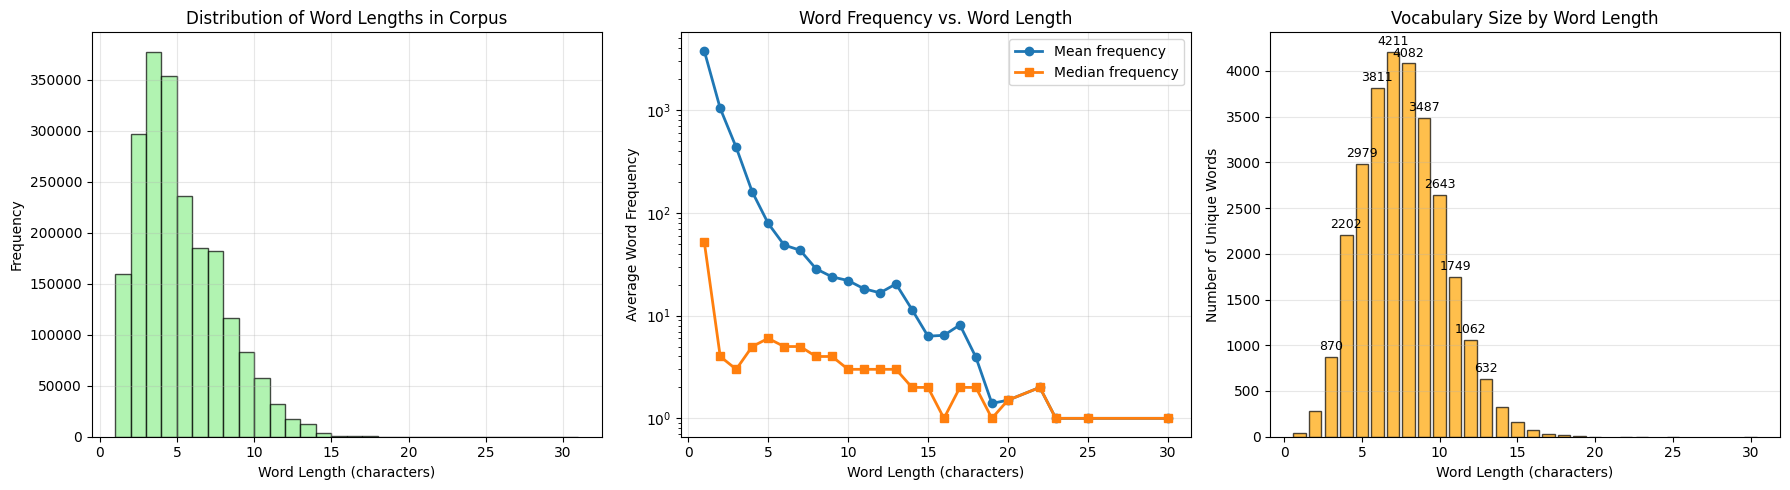


--- Word Length Analysis ---
Average word length: 4.70 characters
Median word length: 4.0 characters
Most common word length: 3 characters
Longest word: 30 characters
Shortest word: 1 characters
Examples of long words (≥10 chars): abandoning, abandonment, abbreviate, abbreviated, abbreviations, abdication, aberration, abnormalities, abolitionism, abomination
Examples of short words (≤2 chars): 0, 00, 03, 04, 05, 06, 07, 0s, 1, 10
----------------------------
Most common word length: 3 characters
Longest word: 30 characters
Shortest word: 1 characters
Examples of long words (≥10 chars): abandoning, abandonment, abbreviate, abbreviated, abbreviations, abdication, aberration, abnormalities, abolitionism, abomination
Examples of short words (≤2 chars): 0, 00, 03, 04, 05, 06, 07, 0s, 1, 10
----------------------------


In [39]:
if 'words' in locals() and words:
    # Word length analysis
    word_lengths = [len(word) for word in words]
    unique_word_lengths = {word: len(word) for word in set(words)}
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Distribution of word lengths in the corpus
    axes[0].hist(word_lengths, bins=range(1, max(word_lengths) + 2), 
                alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0].set_xlabel('Word Length (characters)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Word Lengths in Corpus')
    axes[0].grid(True, alpha=0.3)
    
    # 2. Average word frequency by word length
    length_freq_data = {}
    for word, freq in word_counts.items():
        word_len = len(word)
        if word_len not in length_freq_data:
            length_freq_data[word_len] = []
        length_freq_data[word_len].append(freq)
    
    lengths = sorted(length_freq_data.keys())
    avg_freqs = [np.mean(length_freq_data[l]) for l in lengths]
    med_freqs = [np.median(length_freq_data[l]) for l in lengths]
    
    axes[1].plot(lengths, avg_freqs, 'o-', label='Mean frequency', linewidth=2, markersize=6)
    axes[1].plot(lengths, med_freqs, 's-', label='Median frequency', linewidth=2, markersize=6)
    axes[1].set_xlabel('Word Length (characters)')
    axes[1].set_ylabel('Average Word Frequency')
    axes[1].set_title('Word Frequency vs. Word Length')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_yscale('log')
    
    # 3. Vocabulary size by word length
    vocab_by_length = [len(length_freq_data[l]) for l in lengths]
    
    bars = axes[2].bar(lengths, vocab_by_length, alpha=0.7, color='orange', edgecolor='black')
    axes[2].set_xlabel('Word Length (characters)')
    axes[2].set_ylabel('Number of Unique Words')
    axes[2].set_title('Vocabulary Size by Word Length')
    axes[2].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars for lengths with significant vocabulary
    for length, count in zip(lengths, vocab_by_length):
        if count > max(vocab_by_length) * 0.1:  # Only label significant bars
            axes[2].text(length, count + max(vocab_by_length)*0.01, 
                        f'{count}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print word length statistics
    print(f"\n--- Word Length Analysis ---")
    print(f"Average word length: {np.mean(word_lengths):.2f} characters")
    print(f"Median word length: {np.median(word_lengths):.1f} characters")
    print(f"Most common word length: {max(set(word_lengths), key=word_lengths.count)} characters")
    print(f"Longest word: {max(word_lengths)} characters")
    print(f"Shortest word: {min(word_lengths)} characters")
    
    # Show some examples of very long and very short words
    long_words = [word for word in set(words) if len(word) >= 10]
    short_words = [word for word in set(words) if len(word) <= 2]
    
    if long_words:
        print(f"Examples of long words (≥10 chars): {', '.join(sorted(long_words)[:10])}")
    if short_words:
        print(f"Examples of short words (≤2 chars): {', '.join(sorted(short_words)[:10])}")
    print("----------------------------")
    
else:
    print("⚠️ Words not available. Please run the previous cells.")

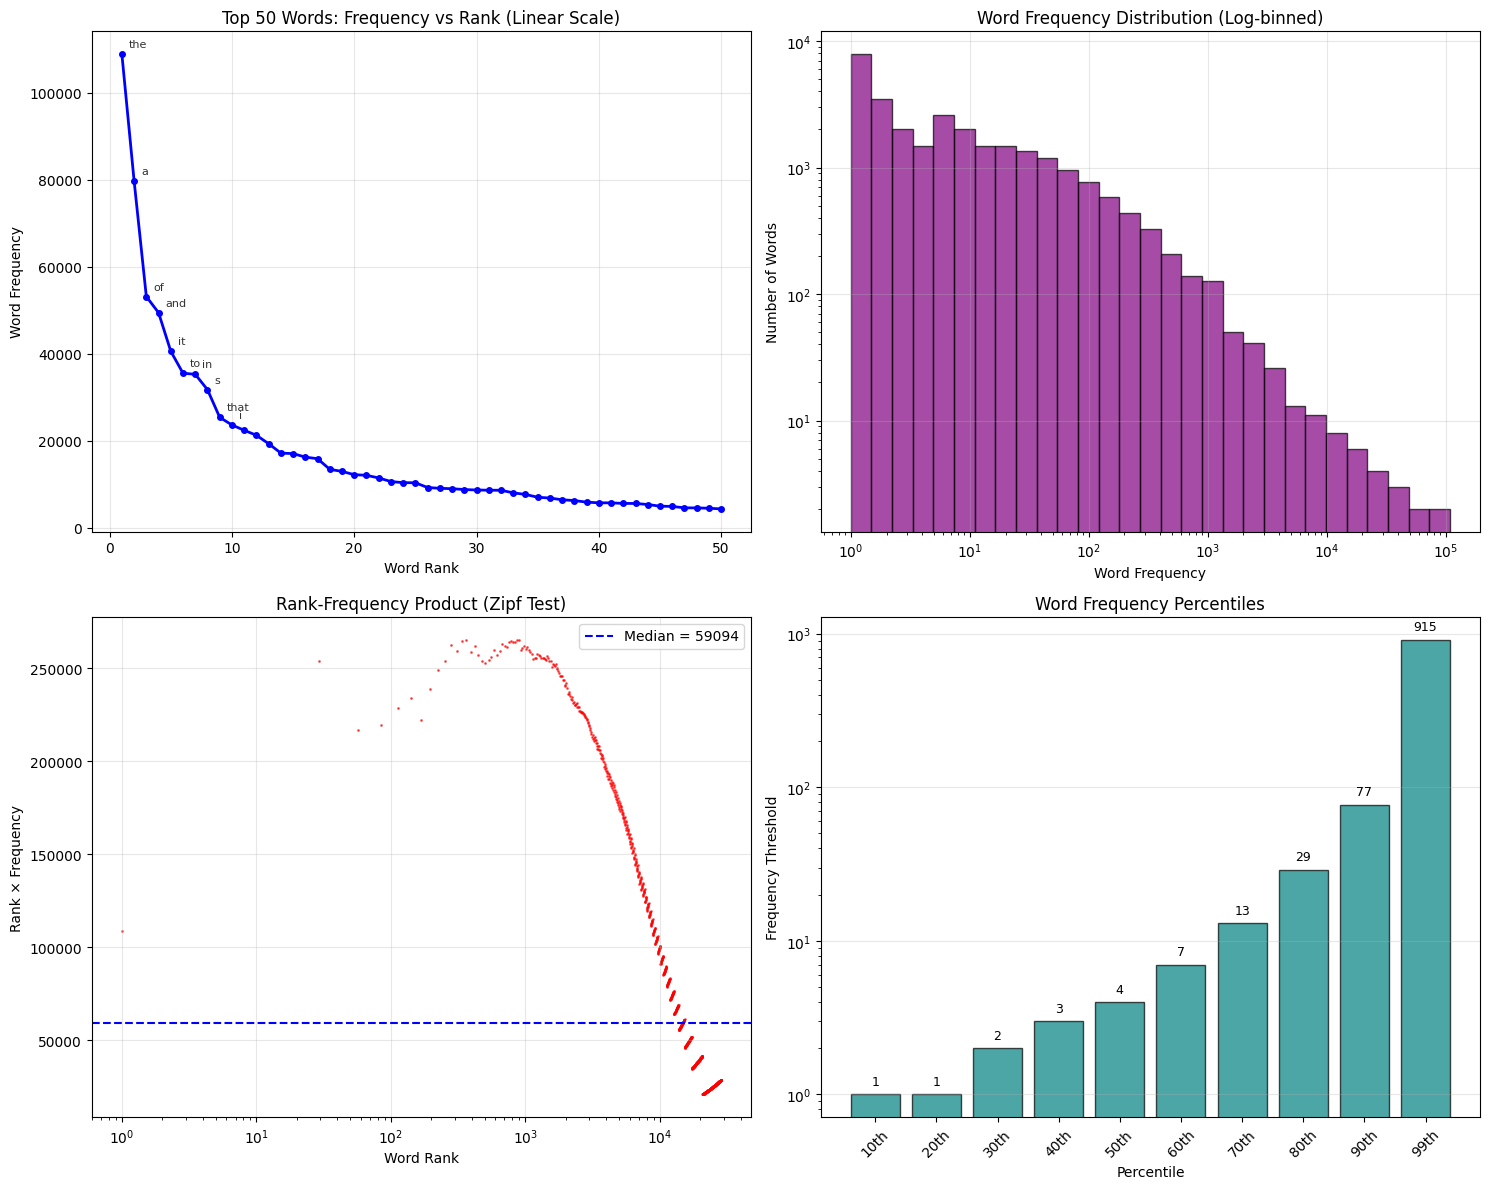


--- Advanced Frequency Statistics ---
Zipf coefficient (rank-frequency correlation): -0.999
Coefficient of variation: 15.07
Frequency range (max/min): 108943
Words covering 50% of corpus: 117
----------------------------------------


In [40]:
if 'word_counts' in locals() and word_counts:
    # Advanced frequency analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Frequency vs Rank (linear scale) - focusing on top words
    sorted_items = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_words = sorted_items[:50]  # Top 50 words
    top_ranks = range(1, len(top_words) + 1)
    top_freqs = [item[1] for item in top_words]
    
    axes[0, 0].plot(top_ranks, top_freqs, 'bo-', linewidth=2, markersize=4)
    axes[0, 0].set_xlabel('Word Rank')
    axes[0, 0].set_ylabel('Word Frequency')
    axes[0, 0].set_title('Top 50 Words: Frequency vs Rank (Linear Scale)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add labels for top 10 words
    for i, (word, freq) in enumerate(top_words[:10]):
        axes[0, 0].annotate(word, (i+1, freq), xytext=(5, 5), 
                           textcoords='offset points', fontsize=8, alpha=0.8)
    
    # 2. Frequency density plot
    frequencies = list(word_counts.values())
    axes[0, 1].hist(frequencies, bins=np.logspace(0, np.log10(max(frequencies)), 30), 
                   alpha=0.7, color='purple', edgecolor='black')
    axes[0, 1].set_xlabel('Word Frequency')
    axes[0, 1].set_ylabel('Number of Words')
    axes[0, 1].set_title('Word Frequency Distribution (Log-binned)')
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Rank-frequency product (should be roughly constant for Zipf distribution)
    all_freqs = sorted(frequencies, reverse=True)
    all_ranks = range(1, len(all_freqs) + 1)
    rank_freq_product = [rank * freq for rank, freq in zip(all_ranks, all_freqs)]
    
    # Sample every 100th point to avoid overcrowding
    sample_indices = range(0, len(rank_freq_product), max(1, len(rank_freq_product) // 1000))
    sampled_ranks = [all_ranks[i] for i in sample_indices]
    sampled_products = [rank_freq_product[i] for i in sample_indices]
    
    axes[1, 0].scatter(sampled_ranks, sampled_products, alpha=0.6, s=1, color='red')
    axes[1, 0].set_xlabel('Word Rank')
    axes[1, 0].set_ylabel('Rank × Frequency')
    axes[1, 0].set_title('Rank-Frequency Product (Zipf Test)')
    axes[1, 0].set_xscale('log')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add horizontal line for the median product (should be roughly constant)
    median_product = np.median(rank_freq_product)
    axes[1, 0].axhline(y=median_product, color='blue', linestyle='--', 
                      label=f'Median = {median_product:.0f}')
    axes[1, 0].legend()
    
    # 4. Frequency deciles analysis
    freq_percentiles = np.percentile(frequencies, [10, 20, 30, 40, 50, 60, 70, 80, 90, 99])
    decile_labels = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', '99th']
    
    bars = axes[1, 1].bar(decile_labels, freq_percentiles, alpha=0.7, color='teal', edgecolor='black')
    axes[1, 1].set_xlabel('Percentile')
    axes[1, 1].set_ylabel('Frequency Threshold')
    axes[1, 1].set_title('Word Frequency Percentiles')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, percentile in zip(bars, freq_percentiles):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height * 1.1,
                       f'{percentile:.0f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis
    print(f"\n--- Advanced Frequency Statistics ---")
    print(f"Zipf coefficient (rank-frequency correlation): {np.corrcoef(np.log(all_ranks[:1000]), np.log(all_freqs[:1000]))[0,1]:.3f}")
    print(f"Coefficient of variation: {np.std(frequencies) / np.mean(frequencies):.2f}")
    print(f"Frequency range (max/min): {max(frequencies) / min(frequencies):.0f}")
    
    # Calculate words covering 50% of corpus efficiently
    total_frequency = sum(frequencies)
    cumulative_sum = 0
    words_for_50_percent = 0
    for freq in all_freqs:
        cumulative_sum += freq
        words_for_50_percent += 1
        if cumulative_sum >= total_frequency * 0.5:
            break
    
    print(f"Words covering 50% of corpus: {words_for_50_percent}")
    print("----------------------------------------")
    
else:
    print("⚠️ Word counts not available. Please run the previous cells.")

## 2.2. Comparative Analysis and Quality Assessment
This final visualization section provides a comprehensive quality assessment by comparing our generated corpus characteristics with theoretical expectations for natural language.

🔍 Performing comprehensive quality assessment of the generated corpus...


C:\Users\Job\AppData\Local\Temp\ipykernel_55740\2142319076.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


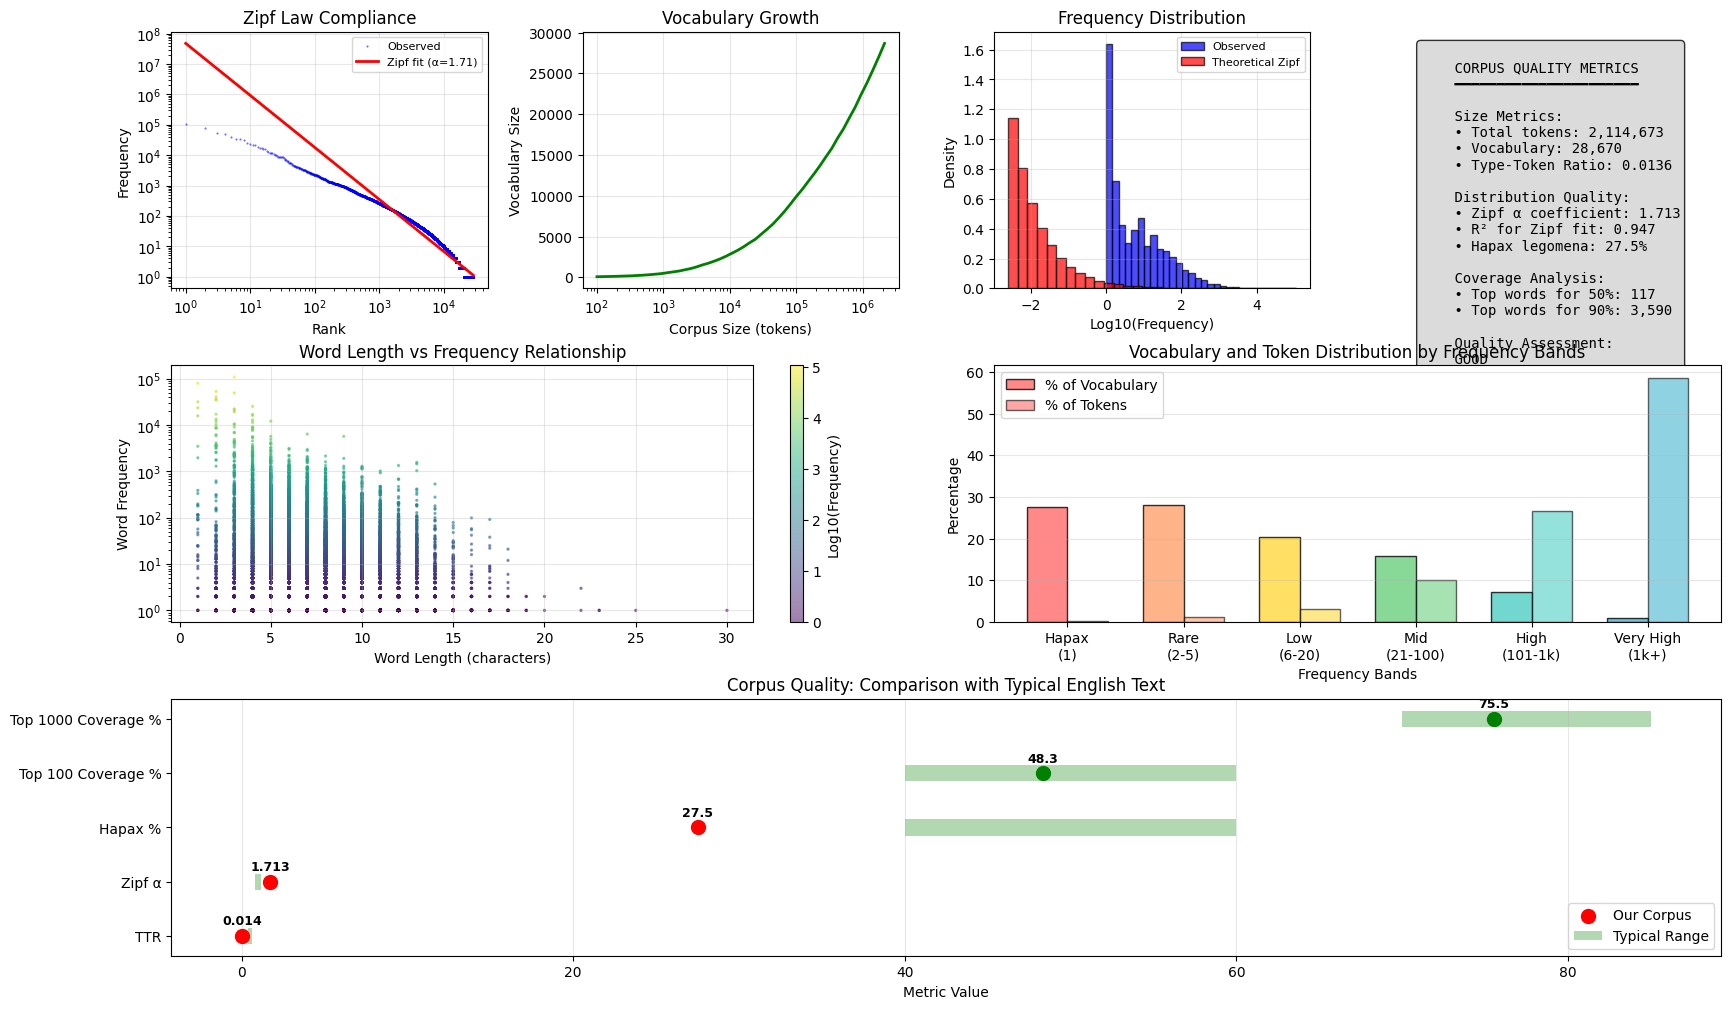


FINAL QUALITY ASSESSMENT
[EXCELLENT] Zipf compliance: R² = 0.947
[OUTSIDE RANGE] Zipf exponent: α = 1.713
[ACCEPTABLE] Hapax ratio: 27.5%
[ADEQUATE] Corpus size: 2,114,673 tokens
[ADEQUATE] Vocabulary size: 28,670 unique words

OVERALL QUALITY SCORE: 3.5/5
CORPUS QUALITY: GOOD - Suitable for most analyses


In [41]:
if 'word_counts' in locals() and word_counts and 'words' in locals() and words:
    # Comprehensive quality assessment
    print("🔍 Performing comprehensive quality assessment of the generated corpus...")
    
    # Calculate key metrics for quality assessment
    frequencies = list(word_counts.values())
    total_tokens = len(words)
    vocabulary_size = len(word_counts)
    
    # Type-Token Ratio (TTR) and related metrics
    ttr = vocabulary_size / total_tokens
    
    # Hapax legomena ratio (words appearing only once)
    hapax_count = sum(1 for f in frequencies if f == 1)
    hapax_ratio = hapax_count / vocabulary_size
    
    # Create a summary dashboard
    fig = plt.figure(figsize=(20, 12))
    
    # Create a grid layout
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
    
    # 1. Zipf law goodness of fit
    ax1 = fig.add_subplot(gs[0, 0])
    sorted_freqs = sorted(frequencies, reverse=True)
    ranks = np.arange(1, len(sorted_freqs) + 1)
    
    # Calculate R-squared for Zipf fit
    log_ranks = np.log10(ranks)
    log_freqs = np.log10(sorted_freqs)
    coeffs = np.polyfit(log_ranks, log_freqs, 1)
    fitted_freqs = 10**(coeffs[0] * log_ranks + coeffs[1])
    
    ax1.loglog(ranks, sorted_freqs, 'b.', alpha=0.6, markersize=1, label='Observed')
    ax1.loglog(ranks, fitted_freqs, 'r-', linewidth=2, label=f'Zipf fit (α={-coeffs[0]:.2f})')
    ax1.set_title('Zipf Law Compliance')
    ax1.set_xlabel('Rank')
    ax1.set_ylabel('Frequency')
    ax1.legend(fontsize=8)
    ax1.grid(True, alpha=0.3)
    
    # 2. Vocabulary growth curve
    ax2 = fig.add_subplot(gs[0, 1])
    # Sample the vocabulary growth to avoid memory issues
    sample_points = np.logspace(2, np.log10(len(words)), 50).astype(int)
    vocab_sizes = []
    
    for n in sample_points:
        vocab_sizes.append(len(set(words[:n])))
    
    ax2.plot(sample_points, vocab_sizes, 'g-', linewidth=2)
    ax2.set_title('Vocabulary Growth')
    ax2.set_xlabel('Corpus Size (tokens)')
    ax2.set_ylabel('Vocabulary Size')
    ax2.set_xscale('log')
    ax2.grid(True, alpha=0.3)
    
    # 3. Frequency distribution comparison with theoretical Zipf
    ax3 = fig.add_subplot(gs[0, 2])
    # Theoretical Zipf distribution
    zipf_alpha = -coeffs[0]
    theoretical_freqs = [sorted_freqs[0] / (r**zipf_alpha) for r in ranks]
    
    ax3.hist(np.log10(sorted_freqs), bins=30, alpha=0.7, density=True, 
             label='Observed', color='blue', edgecolor='black')
    ax3.hist(np.log10(theoretical_freqs), bins=30, alpha=0.7, density=True, 
             label='Theoretical Zipf', color='red', edgecolor='black')
    ax3.set_title('Frequency Distribution')
    ax3.set_xlabel('Log10(Frequency)')
    ax3.set_ylabel('Density')
    ax3.legend(fontsize=8)
    ax3.grid(True, alpha=0.3)
    
    # 4. Quality metrics summary
    ax4 = fig.add_subplot(gs[0, 3])
    ax4.axis('off')
    
    # Calculate additional quality metrics
    coverage_50 = 0
    cumsum = 0
    for i, freq in enumerate(sorted_freqs):
        cumsum += freq
        if cumsum >= total_tokens * 0.5:
            coverage_50 = i + 1
            break
    
    coverage_90 = 0
    cumsum = 0
    for i, freq in enumerate(sorted_freqs):
        cumsum += freq
        if cumsum >= total_tokens * 0.9:
            coverage_90 = i + 1
            break
    
    r_squared = 1 - np.sum((log_freqs - (coeffs[0] * log_ranks + coeffs[1]))**2) / np.sum((log_freqs - np.mean(log_freqs))**2)
    
    # Calculate quality assessment
    if r_squared > 0.95 and 0.8 < zipf_alpha < 1.2:
        quality_assessment = 'EXCELLENT'
    elif r_squared > 0.9:
        quality_assessment = 'GOOD'
    else:
        quality_assessment = 'NEEDS REVIEW'
    
    quality_text = f"""
    CORPUS QUALITY METRICS
    ━━━━━━━━━━━━━━━━━━━━━━
    
    Size Metrics:
    • Total tokens: {total_tokens:,}
    • Vocabulary: {vocabulary_size:,}
    • Type-Token Ratio: {ttr:.4f}
    
    Distribution Quality:
    • Zipf α coefficient: {zipf_alpha:.3f}
    • R² for Zipf fit: {r_squared:.3f}
    • Hapax legomena: {hapax_ratio:.1%}
    
    Coverage Analysis:
    • Top words for 50%: {coverage_50:,}
    • Top words for 90%: {coverage_90:,}
    
    Quality Assessment:
    {quality_assessment}
    """
    
    ax4.text(0.05, 0.95, quality_text, transform=ax4.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
    
    # 5. Word length vs frequency scatter
    ax5 = fig.add_subplot(gs[1, :2])
    word_lengths = []
    word_freqs = []
    for word, freq in word_counts.items():
        word_lengths.append(len(word))
        word_freqs.append(freq)
    
    scatter = ax5.scatter(word_lengths, word_freqs, alpha=0.5, s=2, c=np.log10(word_freqs), cmap='viridis')
    ax5.set_xlabel('Word Length (characters)')
    ax5.set_ylabel('Word Frequency')
    ax5.set_title('Word Length vs Frequency Relationship')
    ax5.set_yscale('log')
    ax5.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax5, label='Log10(Frequency)')
    
    # 6. Frequency bands comparison
    ax6 = fig.add_subplot(gs[1, 2:])
    
    # Define frequency bands
    bands = [(1, 1), (2, 5), (6, 20), (21, 100), (101, 1000), (1001, float('inf'))]
    band_labels = ['Hapax\n(1)', 'Rare\n(2-5)', 'Low\n(6-20)', 'Mid\n(21-100)', 'High\n(101-1k)', 'Very High\n(1k+)']
    band_colors = ['#FF6B6B', '#FFA06B', '#FFD93D', '#6BCF7F', '#4ECDC4', '#45B7D1']
    
    band_counts = []
    band_tokens = []
    
    for lower, upper in bands:
        count = sum(1 for f in frequencies if lower <= f <= upper)
        tokens = sum(f for f in frequencies if lower <= f <= upper)
        band_counts.append(count)
        band_tokens.append(tokens)
    
    # Create stacked bar chart
    x_pos = np.arange(len(band_labels))
    
    # Normalize for percentage
    band_counts_pct = [c / vocabulary_size * 100 for c in band_counts]
    band_tokens_pct = [t / total_tokens * 100 for t in band_tokens]
    
    width = 0.35
    ax6.bar(x_pos - width/2, band_counts_pct, width, label='% of Vocabulary', 
            color=band_colors, alpha=0.8, edgecolor='black')
    ax6.bar(x_pos + width/2, band_tokens_pct, width, label='% of Tokens', 
            color=band_colors, alpha=0.6, edgecolor='black')
    
    ax6.set_xlabel('Frequency Bands')
    ax6.set_ylabel('Percentage')
    ax6.set_title('Vocabulary and Token Distribution by Frequency Bands')
    ax6.set_xticks(x_pos)
    ax6.set_xticklabels(band_labels)
    ax6.legend()
    ax6.grid(True, alpha=0.3, axis='y')
    
    # 7. Comparative analysis with typical English
    ax7 = fig.add_subplot(gs[2, :])
    
    # Typical values for English text
    typical_metrics = {
        'TTR': (0.4, 0.6),  # Typical range for TTR
        'Zipf α': (0.8, 1.2),  # Typical Zipf exponent
        'Hapax %': (40, 60),  # Typical hapax legomena percentage
        'Top 100 Coverage %': (40, 60),  # Coverage by top 100 words
        'Top 1000 Coverage %': (70, 85)  # Coverage by top 1000 words
    }
    
    # Calculate our metrics
    top_100_coverage = sum(sorted_freqs[:min(100, len(sorted_freqs))]) / total_tokens * 100
    top_1000_coverage = sum(sorted_freqs[:min(1000, len(sorted_freqs))]) / total_tokens * 100
    
    our_metrics = {
        'TTR': ttr,
        'Zipf α': zipf_alpha,
        'Hapax %': hapax_ratio * 100,
        'Top 100 Coverage %': top_100_coverage,
        'Top 1000 Coverage %': top_1000_coverage
    }
    
    metrics_names = list(typical_metrics.keys())
    y_pos = np.arange(len(metrics_names))
    
    # Plot ranges and our values
    for i, metric in enumerate(metrics_names):
        lower, upper = typical_metrics[metric]
        our_value = our_metrics[metric]
        
        # Draw range bar
        ax7.barh(i, upper - lower, left=lower, height=0.3, 
                alpha=0.3, color='green', label='Typical Range' if i == 0 else "")
        
        # Draw our value
        color = 'green' if lower <= our_value <= upper else 'red'
        ax7.scatter(our_value, i, s=100, color=color, zorder=5, 
                   label='Our Corpus' if i == 0 else "")
        
        # Add value text
        ax7.text(our_value, i + 0.15, f'{our_value:.3f}' if our_value < 10 else f'{our_value:.1f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax7.set_yticks(y_pos)
    ax7.set_yticklabels(metrics_names)
    ax7.set_xlabel('Metric Value')
    ax7.set_title('Corpus Quality: Comparison with Typical English Text')
    ax7.legend(loc='lower right')
    ax7.grid(True, alpha=0.3, axis='x')
    
    # Use constrained layout instead of tight_layout to avoid warnings
    try:
        plt.tight_layout()
    except:
        # If tight_layout fails, use subplots_adjust as fallback
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    plt.show()
    
    # Final quality summary
    print(f"\n{'='*60}")
    print(f"FINAL QUALITY ASSESSMENT")
    print(f"{'='*60}")
    
    quality_score = 0
    max_score = 5
    
    if 0.9 <= r_squared <= 1.0:
        quality_score += 1
        print(f"[EXCELLENT] Zipf compliance: R² = {r_squared:.3f}")
    elif 0.8 <= r_squared < 0.9:
        quality_score += 0.5
        print(f"[GOOD] Zipf compliance: R² = {r_squared:.3f}")
    else:
        print(f"[POOR] Zipf compliance: R² = {r_squared:.3f}")
    
    if 0.8 <= zipf_alpha <= 1.2:
        quality_score += 1
        print(f"[EXCELLENT] Zipf exponent: α = {zipf_alpha:.3f}")
    else:
        print(f"[OUTSIDE RANGE] Zipf exponent: α = {zipf_alpha:.3f}")
    
    if 40 <= hapax_ratio * 100 <= 60:
        quality_score += 1
        print(f"[EXCELLENT] Hapax ratio: {hapax_ratio*100:.1f}%")
    else:
        quality_score += 0.5
        print(f"[ACCEPTABLE] Hapax ratio: {hapax_ratio*100:.1f}%")
    
    if total_tokens >= 10000:
        quality_score += 1
        print(f"[ADEQUATE] Corpus size: {total_tokens:,} tokens")
    else:
        print(f"[TOO SMALL] Corpus size: {total_tokens:,} tokens")
    
    if vocabulary_size >= 1000:
        quality_score += 1
        print(f"[ADEQUATE] Vocabulary size: {vocabulary_size:,} unique words")
    else:
        print(f"[TOO SMALL] Vocabulary size: {vocabulary_size:,} unique words")
    
    print(f"\nOVERALL QUALITY SCORE: {quality_score}/{max_score}")
    
    if quality_score >= 4:
        print("CORPUS QUALITY: EXCELLENT - Ready for linguistic analysis!")
    elif quality_score >= 3:
        print("CORPUS QUALITY: GOOD - Suitable for most analyses")
    elif quality_score >= 2:
        print("CORPUS QUALITY: FAIR - May need improvements")
    else:
        print("CORPUS QUALITY: POOR - Significant improvements needed")
    
    print(f"{'='*60}")
    
else:
    print("Data not available. Please run the previous cells to load and process the corpus.")

## 3. Inspect Most and Least Frequent Words
As a final sanity check, let's look at the most common and least common words. The most frequent should be common function words (e.g., 'the', 'a', 'is'). The least frequent words can give us an idea of the diversity and potential noise at the tail end of the distribution.

In [42]:
if 'word_counts' in locals():
    # Create a DataFrame for easier viewing
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
    freq_df = freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    print("--- Top 20 Most Frequent Words ---")
    print(freq_df.head(20))
    print("\n" + "="*35 + "\n")
    
    # Words that appear only once
    single_occurrence_words = freq_df[freq_df['frequency'] == 1]
    
    print(f"--- {len(single_occurrence_words)} Words with a Single Occurrence (Hapax Legomena) ---")
    # Display a random sample if there are many
    if len(single_occurrence_words) > 20:
        print("(Showing a random sample of 20)")
        print(single_occurrence_words.sample(20))
    else:
        print(single_occurrence_words)
        
else:
    print("⚠️ Word counts not available. Please run previous cells.")


--- Top 20 Most Frequent Words ---
     word  frequency
0     the     108943
1       a      79787
2      of      53158
3     and      49441
4      it      40569
5      to      35514
6      in      35280
7       s      31732
8    that      25371
9       i      23625
10    but      22392
11    not      21253
12    you      19309
13     is      17153
14   just      17030
15   with      16225
16      t      15857
17     or      13409
18   like      12937
19  about      12176


--- 7884 Words with a Single Occurrence (Hapax Legomena) ---
(Showing a random sample of 20)
                word  frequency
27828      upcycling          1
22584            253          1
25700       kimmerer          1
28125    protections          1
23628     redemption          1
22753     postpartum          1
26303            cgi          1
25389           1895          1
22045  prescriptions          1
26357    strongholds          1
21214      corrosion          1
28001        browsed          1
28099        